# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
print('Beginning Data Retrieval')
print('-----------------------------')
city=[]
cloudiness=[]
country=[]
date=[]
humidity=[]
lat=[]
lng=[]
max_temp=[]
wind_speed=[]
n = 0
for i in range(len(cities)):
    target_url=f"http://api.openweathermap.org/data/2.5/weather?appid={api_key}&q={cities[i]}"
    city_weather=requests.get(target_url).json()
    if city_weather['cod']=='404':
        n = n
        print(f"City not found. Skipping...")
    else:
        city.append(city_weather['name'])
        cloudiness.append(city_weather['clouds']['all'])
        country.append(city_weather['sys']['country'])
        date.append(city_weather['dt'])
        humidity.append(city_weather['main']['humidity'])
        lat.append(city_weather['coord']['lat'])
        lng.append(city_weather['coord']['lon'])
        max_temp.append(round(city_weather['main']['temp_max']*9/5-459.67,2))
        wind_speed.append(round(city_weather['wind']['speed'],2))
        n = n+1
        print(f"Processing Record {n} | {cities[i]}")

print('-----------------------------')
print('Data Retrieval Complete')
print('-----------------------------')

Beginning Data Retrieval
-----------------------------
Processing Record 1 | carnarvon
Processing Record 2 | hofn
Processing Record 3 | puerto ayora
Processing Record 4 | mataura
Processing Record 5 | pangkalanbuun
Processing Record 6 | ushuaia
Processing Record 7 | new norfolk
Processing Record 8 | arraial do cabo
City not found. Skipping...
Processing Record 9 | hithadhoo
Processing Record 10 | vilyuysk
Processing Record 11 | bredasdorp
City not found. Skipping...
City not found. Skipping...
Processing Record 12 | rikitea
Processing Record 13 | busselton
Processing Record 14 | channel-port aux basques
Processing Record 15 | albany
City not found. Skipping...
Processing Record 16 | kapaa
Processing Record 17 | victoria
City not found. Skipping...
Processing Record 18 | lemoore
Processing Record 19 | airai
Processing Record 20 | ereymentau
Processing Record 21 | alyangula
Processing Record 22 | danville
Processing Record 23 | khatanga
Processing Record 24 | udachnyy
Processing Record 2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data=pd.DataFrame({'City':city,
                        'Cloudiness':cloudiness,
                        'Country':country,
                        'Date':date,
                        'Humidity':humidity,
                        'Lat':lat,
                        'Lng':lng,
                        'Max Temp':max_temp,
                        'Wind Speed':wind_speed})
city_data.to_csv("city data.csv",index=False)

city_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Carnarvon,0,ZA,1571027796,26,-30.97,22.13,66.15,6.65
1,Hofn,61,IS,1571027797,71,64.25,-15.21,44.74,5.92
2,Puerto Ayora,0,EC,1571027797,89,-0.74,-90.35,68.00,5.17
3,Mataura,100,NZ,1571027797,89,-46.19,168.86,53.76,2.89
4,Pangkalanbuun,66,ID,1571027797,31,-2.68,111.62,99.41,1.11


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

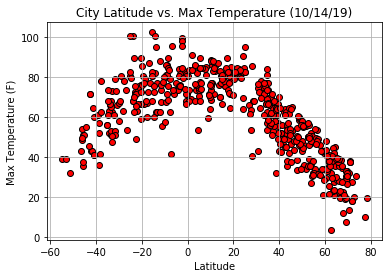

In [6]:
fig,ax=plt.subplots()
ax.scatter(lat,max_temp,c='r',edgecolor='0')
ax.set_xlabel('Latitude')
ax.set_ylabel('Max Temperature (F)')
ax.set_title('City Latitude vs. Max Temperature (10/14/19)')
ax.grid()
plt.savefig('Latitude vs Temp.png')

#### Latitude vs. Humidity Plot

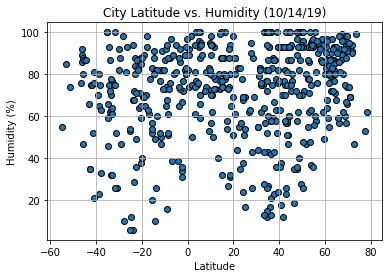

In [7]:
fig,ax=plt.subplots()
ax.scatter(lat,humidity,edgecolor='0')
ax.set_xlabel('Latitude')
ax.set_ylabel('Humidity (%)')
ax.set_title('City Latitude vs. Humidity (10/14/19)')
ax.grid()
plt.savefig('Latitude vs Humidity.png')

#### Latitude vs. Cloudiness Plot

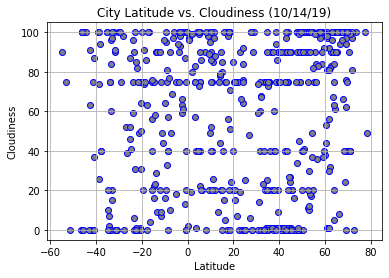

In [8]:
fig,ax=plt.subplots()
ax.scatter(lat,cloudiness,c='grey',edgecolor='b')
ax.set_xlabel('Latitude')
ax.set_ylabel('Cloudiness')
ax.set_title('City Latitude vs. Cloudiness (10/14/19)')
ax.grid()
plt.savefig('Latitude vs Cloudiness.png')

#### Latitude vs. Wind Speed Plot

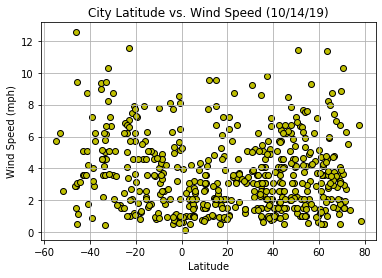

In [9]:
fig,ax=plt.subplots()
ax.scatter(lat,wind_speed,c='y',edgecolor='0')
ax.set_xlabel('Latitude')
ax.set_ylabel('Wind Speed (mph)')
ax.set_title('City Latitude vs. Wind Speed (10/14/19)')
ax.grid()
plt.savefig('Latitude vs Wind Speed.png')